# Projeto Final - Sistemas Digitais

## Implementando uma Rede Neural embarcada



#### Alunos:
- Fernando Lucas Sousa Silva
- Teophilo Vitor de Carvalho Clemente

## Implementação:
- Importação das Bibliotecas utilizadas

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as stl
stl.use('default')
#import missingno as msno
%matplotlib inline

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

from sklearn.metrics import mean_squared_error
from math import sqrt

- Leitura dos arquivos contendo os dados

In [ ]:
tf.random.set_seed(42)

In [ ]:
x_in = pd.read_csv('./X_In.csv')
y_out = pd.read_csv('./Y_Out.csv')

- Definição de dados de teste e treinamento:
  - 80% para treinamento;
  - 20% para teste.

In [ ]:
x_in.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
G,3000.0,2.590285,1.604734,0.010077,0.665077,2.903298,3.974684,4.998365
F,3000.0,1.965161,1.690472,0.010112,0.405278,1.399470,3.562746,4.997755
E,3000.0,1.649671,1.631066,0.011430,0.341464,0.661101,3.171319,4.996231
D,3000.0,2.561969,1.599814,0.011554,0.649327,2.826391,3.917133,4.998732
C,3000.0,3.209406,1.243147,0.011094,2.522144,3.380168,4.194329,4.999503
B,3000.0,2.885497,1.475650,0.014197,2.195208,3.129513,4.080856,4.999700
A,3000.0,2.881446,1.460738,0.011204,2.206358,3.122611,4.047043,4.998118


In [ ]:
y_out.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
D8,3000.0,0.2,0.400067,0.0,0.0,0.0,0.0,1.0
D4,3000.0,0.4,0.489980,0.0,0.0,0.0,1.0,1.0
D2,3000.0,0.4,0.489980,0.0,0.0,0.0,1.0,1.0
D1,3000.0,0.5,0.500083,0.0,0.0,0.5,1.0,1.0


In [ ]:
train_x, test_x, train_y, test_y = train_test_split(x_in, y_out, test_size=0.2, random_state=42)

## Criação do modelo de aprendizagem de máquina (Machine Learning)
- 3 camadas:
  - Camada de entrada;
  - Camada de ativação por Tanh (20 neurônios);
  - Camada de saída com ativação sigmoid (4 neurônios).

In [ ]:
model = keras.Sequential([
  keras.layers.InputLayer(input_shape=(7,)),
  keras.layers.Dense(20, activation = 'tanh'),                        
  keras.layers.Dense(4, activation = 'sigmoid'),
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                160       
                                                                 
 dense_1 (Dense)             (None, 4)                 84        
                                                                 
Total params: 244
Trainable params: 244
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True) , metrics=['binary_accuracy'])

- Treinamento por 70 épocas

In [ ]:
training = model.fit(train_x, train_y, epochs=70, batch_size=32, validation_data=(test_x, test_y))

Epoch 1/70


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


68/75 [==========================>...] - ETA: 0s - loss: 0.6212 - binary_accuracy: 0.6589

/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


75/75 [==============================] - 2s 11ms/step - loss: 0.6159 - binary_accuracy: 0.6678 - val_loss: 0.5482 - val_binary_accuracy: 0.7804
Epoch 2/70
75/75 [==============================] - 0s 6ms/step - loss: 0.5209 - binary_accuracy: 0.7895 - val_loss: 0.4889 - val_binary_accuracy: 0.8054
Epoch 3/70
75/75 [==============================] - 1s 7ms/step - loss: 0.4698 - binary_accuracy: 0.8148 - val_loss: 0.4436 - val_binary_accuracy: 0.8283
Epoch 4/70
75/75 [==============================] - 1s 7ms/step - loss: 0.4290 - binary_accuracy: 0.8326 - val_loss: 0.4077 - val_binary_accuracy: 0.8367
Epoch 5/70
75/75 [==============================] - 1s 8ms/step - loss: 0.3957 - binary_accuracy: 0.8435 - val_loss: 0.3778 - val_binary_accuracy: 0.8450
Epoch 6/70
75/75 [==============================] - 0s 6ms/step - loss: 0.3668 - binary_accuracy: 0.8568 - val_loss: 0.3508 - val_binary_accuracy: 0.8554
Epoch 7/70
75/75 [==============================] - 0s 6ms/step - loss: 0.3404 - binar

- Gráfico de desempenho

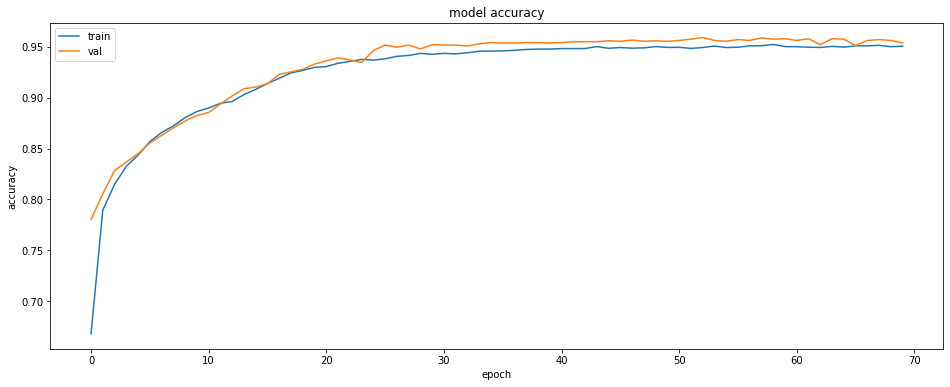

In [ ]:
plt.figure(figsize=(16,6))
plt.plot(training.history['binary_accuracy'])
plt.plot(training.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

- Obtenção dos pesos

In [ ]:
for layer in model.layers:
    print(layer.trainable_weights)

[<tf.Variable 'dense/kernel:0' shape=(7, 20) dtype=float32, numpy=
array([[-0.04022649,  0.01311583,  0.2128712 ,  0.03673191, -2.1034918 ,
        -0.12400191, -0.06401231,  0.24323067, -0.53678805, -0.8636676 ,
        -0.21064481,  0.30001962,  0.2589999 ,  0.12051471,  0.14671907,
         0.9387061 , -0.6293177 ,  0.5901386 ,  0.6600167 ,  0.15299201],
       [ 0.04086897,  0.23465408, -0.03916394,  0.02730575,  0.3052402 ,
        -1.8217739 , -0.11511603, -0.09247869,  0.03089312,  0.4011109 ,
         0.6910111 , -1.0332177 ,  1.2775631 ,  0.3127477 ,  0.29360217,
         0.59912527,  1.0757821 ,  0.70192623, -0.7324807 , -0.29095435],
       [-0.5115854 ,  0.75463027,  0.46590626, -1.6780789 ,  0.5217109 ,
        -0.0777854 , -0.17283241, -1.5077453 ,  0.39752507, -0.28183523,
         0.37622795, -1.0025382 ,  0.94857943, -0.06627414, -0.8077671 ,
        -0.09496963,  0.05365459, -0.7204917 ,  0.653368  ,  0.6384575 ],
       [-0.41898602,  0.01744807,  0.41817775,  0.0599

In [ ]:
test_x.sort_index()

,G,F,E,D,C,B,A
0,4.231242,0.780309,4.730696,2.156199,0.645430,3.787909,2.969870
7,3.248883,3.963605,2.480934,2.342360,2.148365,2.515147,2.679940
14,2.165546,2.606078,4.480857,4.640366,2.910774,0.280002,2.226920
29,0.762152,0.456854,0.519661,0.136258,3.252902,2.232822,2.586500
30,0.539122,0.515996,0.651057,0.768716,2.728080,4.343338,0.110626
...,...,...,...,...,...,...,...
2988,4.112162,2.628120,4.132601,4.813071,3.580260,0.464735,3.200064
2991,2.066077,0.465431,0.267887,3.849266,3.770933,4.076861,2.807306
2994,4.118525,0.373296,3.368020,3.148420,0.307295,2.209782,2.583113
2996,0.618115,0.450802,0.306972,0.445826,4.610452,3.433284,3.341625


In [ ]:
test_y.sort_index()

,D8,D4,D2,D1
0,0,0,1,0
7,1,0,0,0
14,0,1,1,0
29,0,1,1,1
30,0,0,0,1
...,...,...,...,...
2988,0,1,1,0
2991,1,0,0,1
2994,0,0,1,0
2996,0,1,1,1
